Carga de librerías

In [1]:
import os
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd
import matplotlib.pyplot as plt

Definición de rutas relativas del archivo para carga de datos

In [2]:
### Setting up the data_path
ROOT = os.path.dirname(os.getcwd())
data_path = os.path.join(ROOT, 'data', 'Data pt1')

# Proyecciones cartográficas

Las proyecciones cartográficas surgen de la necesidad de representar a la tierra, que es un objeto esférico en 3 dimensiones, en un plano en dos dimensiones. Como respuesta surgió el _Geographic Coordinate System_ (**CGS**), que ayuda a definir ubicaciones sobre la superficie de la Tierra basado en la longitud y latitud de la ubicación:

* **Longitud**: Son las líneas que recorren de Norte a Sur a la Tierra, y que puedo tomar valores de 0° a +180° para el Este, y de 0° a -180° para el Oeste
* **Latitud**: Son las líneas que recorren de Este a Oeste a la Tierra, y que pueden tomar valores de 0° a +90° para el hemisferio norte, y de 0° a -90° para el hemisfero sur

Debido a que existen diversos modelos de la Tierra, también existen diversas versiones de CGS siendo la WGS84 el estándar internacional más preciso hoy en día. En función de la región de la Tierra en la que se esté enfocando un determinado análisis será la elección de la proyección cartógráfica, también conocidad como _Projected Coordinate System_ (**PCS**)

Para ilustrarlo, se hará la proyección de un mismo conjunto de datos utilizando diferentes proyecciones cartográficas:

In [3]:
# Shapefile de datos globales
world  = gpd.read_file(
    filename=gpd.datasets.get_path("naturalearth_lowres"))

# Shapefile de capitales
capitals = gpd.read_file(
    filename=os.path.join(data_path, 'ne_110m_populated_places', 'ne_110m_populated_places.shp'))
capitals = capitals[capitals["FEATURECLA"]=="Admin-0 capital"]

# Shapefile de 
grat = gpd.read_file(
    filename=os.path.join(data_path, 'Graticule', 'ne_110m_graticules_10.shp'))

C:\Users\Miguel\AppData\Local\Temp\ipykernel_9148\4161857168.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  filename=gpd.datasets.get_path("naturalearth_lowres"))


Ahora se filtran los datos para hacer sentido espacial:

In [4]:
world_mask = world[world['continent'].isin(['Oceania','Africa','Asia','Europe'])]

## Proyección de áreas iguales

Esta proyección mantiene el tamaño relativo de un área a lo largo del mapa, lo que significa que para cualquier región dada en el mapa y sus características, estas respetarán su tamaño real

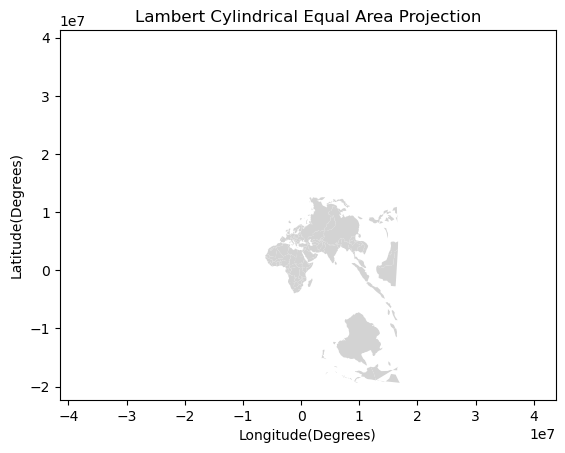

In [5]:
# Datos de visualización
world_9834 = world_mask.to_crs(crs='EPSG:9834')

# Especificaciones de figura
fig, ax = plt.subplots()

# Elementos de visualización
world_9834.plot(ax=ax, color="lightgray")

# Anotaciones y estilo
ax.set(
    xlabel="Longitude(Degrees)"
    ,ylabel="Latitude(Degrees)"
    ,title="Lambert Cylindrical Equal Area Projection")
plt.axis('equal')

plt.show()

## Proyección sinusoidal

Es una proyección pseudo-cilíndrica que despliega todos los paralelos así como el meridiano central en su escala real. Dado que los paralelos en los extremos de la Tierra son más pequeños que en el ecuador, esto resulta en una mayor distorsión en los polos

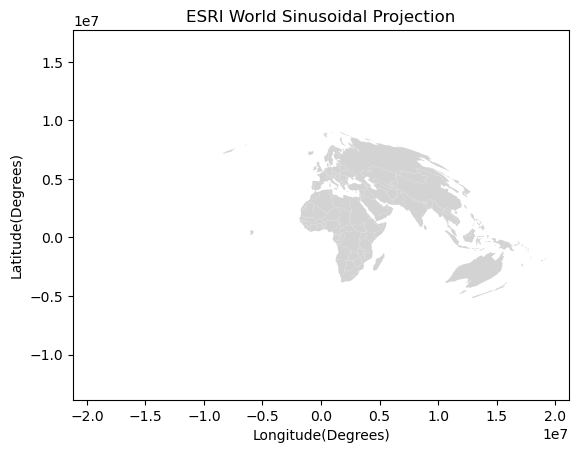

In [6]:
# Datos de visualización
world_3857 = world_mask.to_crs('ESRI: 54008')

# Especificaciones de figura
fig, ax = plt.subplots()

# Elementos de visualización
world_3857.plot(ax=ax, color="lightgray")

# Anotaciones y estilo
ax.set(
    xlabel="Longitude(Degrees)"
    ,ylabel="Latitude(Degrees)"
    ,title="ESRI World Sinusoidal Projection")
plt.axis('equal')
    
plt.show()

## Proyección Mercator

Es una proyección cilíndrica que hace que los paralelos y meridianos se intersecten de modo que formen rectángulos. En esta proyección, los meridianos son líneas verticales y los paralelos son líneas horizaontales

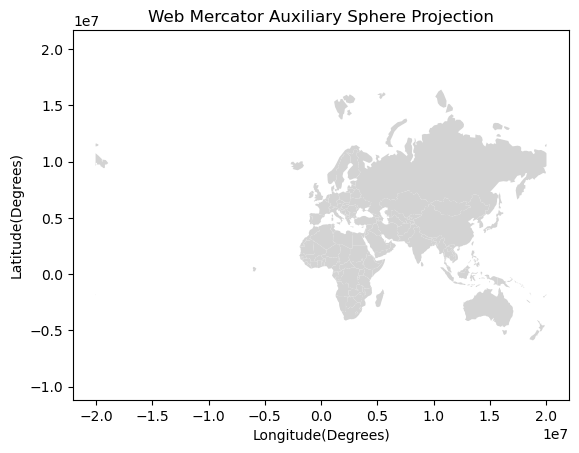

In [7]:
# Datos de visualización
world_3857 = world_mask.to_crs('EPSG:3857')

# Configuraciones de figura
fig, ax = plt.subplots()

# Elementos de visualización
world_3857.plot(ax=ax, color="lightgray")

# Anotaciones y estilo
ax.set(
    xlabel="Longitude(Degrees)"
    ,ylabel="Latitude(Degrees)"
    ,title="Web Mercator Auxiliary Sphere Projection")
plt.axis('equal')

plt.show()

## Proyección cónica equidistante

Una proyección equidastante es aquella que mantiene la escala a lo largo de una o múltiples líneas. Se usa comunmente para producir mapas de países que son muy pequeños, o aquellos que abarquen grandes distancias de Este a Oeste a lo largo de la Tierra.

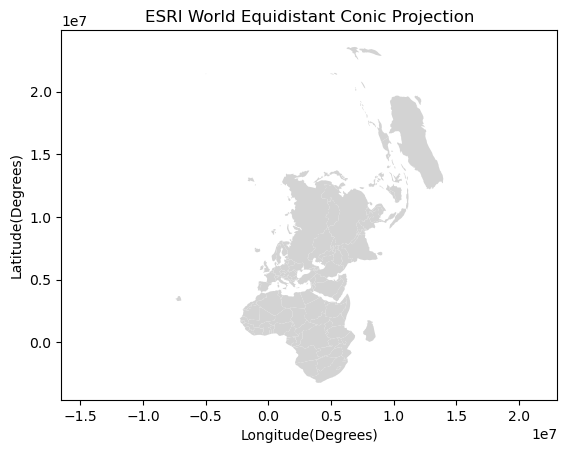

In [8]:
# Datos de visualización
world_54027 = world_mask.to_crs('ESRI:54027')

# Configuraciones de figura
fig, ax = plt.subplots()

# Elementos de visualización
world_54027.plot(ax=ax, color="lightgray")

# Anotaciones y estilo
ax.set(
    xlabel="Longitude(Degrees)"
    ,ylabel="Latitude(Degrees)"
    ,title="ESRI World Equidistant Conic Projection")
plt.axis('equal')

plt.show()

## Proyección equidistante azimutal

Una proyección azimutal es aquella que mantiene una dirección dada de un putno central, distorsionando la escala misma que sólo es la escala verdadera a lo largo de las direcciones que se están proyectando. 

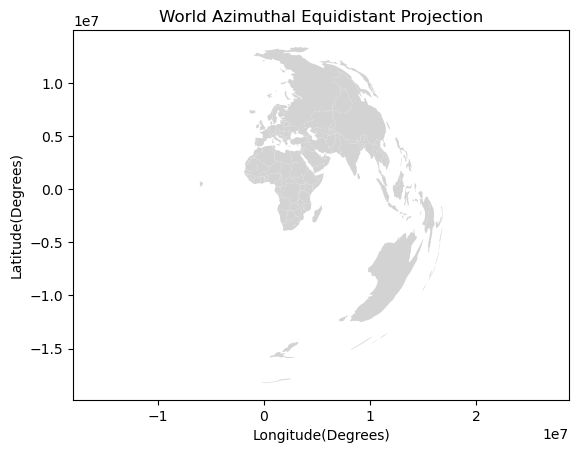

In [9]:
# Datos de visualización
world_54032 = world_mask.to_crs('ESRI:54032')

# Configuraciones de figura
fig, ax = plt.subplots()

# Elementos de visualización
world_54032.plot(ax=ax, color="lightgray")

# Anotaciones y estilo
ax.set(
    xlabel="Longitude(Degrees)"
    ,ylabel="Latitude(Degrees)"
    ,title="World Azimuthal Equidistant Projection")
plt.axis('equal')

plt.show()

## Hands on with Geopandas

In [15]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
capitals.crs == world.crs == grat.crs

True

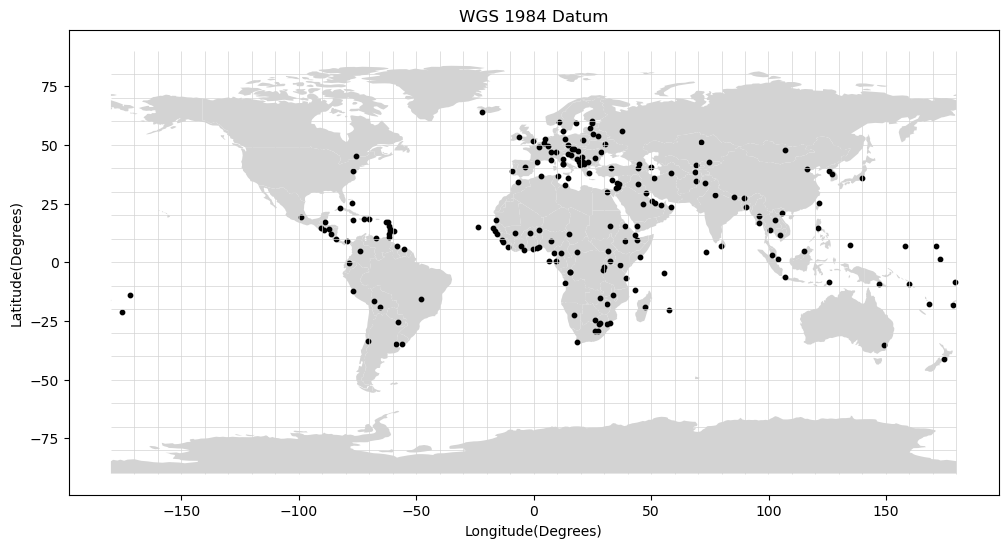

In [17]:
fig, ax = plt.subplots(figsize=(12,10))
world.plot(ax=ax, color="lightgray")
capitals.plot(ax=ax, color="black", markersize=10, marker ="o")
grat.plot(ax=ax, color="lightgray", linewidth=0.5)
ax.set(xlabel="Longitude(Degrees)",
 ylabel="Latitude(Degrees)",
 title="WGS 1984 Datum")
plt.show()

In [18]:
world_ae = world.to_crs("ESRI:54032")
graticules_ae = grat.to_crs("ESRI:54032")

In [19]:
world_ae.crs

<Derived Projected CRS: ESRI:54032>
Name: World_Azimuthal_Equidistant
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Azimuthal_Equidistant
- method: Modified Azimuthal Equidistant
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

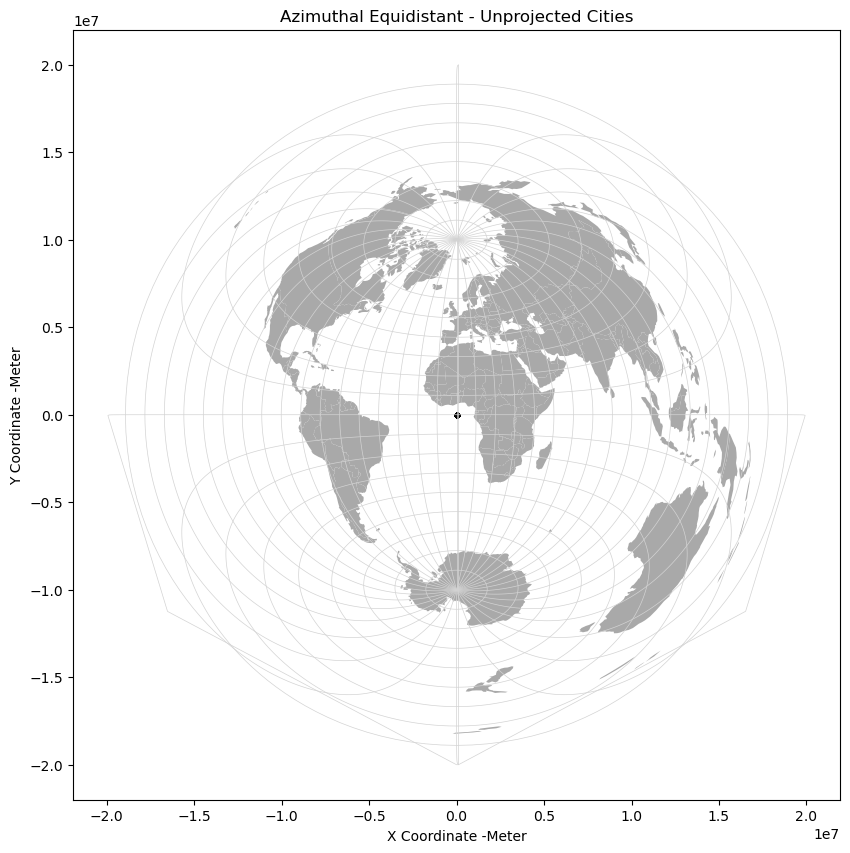

In [20]:
def plot_map_layers(gdf_1, gdf_2, gdf_3, name,unit):
     fig, ax = plt.subplots(figsize=(12,10))
     gdf_1.plot(ax=ax, color="darkgray")
     gdf_2.plot(ax=ax, color="black", markersize=10, marker ="o")
     gdf_3.plot(ax=ax, color="lightgray", linewidth=0.5)
     ax.set(xlabel="X Coordinate -"+ unit,
            ylabel="Y Coordinate -" + unit,
            title=name
            )
plt.show()
plot_map_layers(world_ae, capitals, graticules_ae, "Azimuthal Equidistant - Unprojected Cities", "Meter")

In [22]:
capitals.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

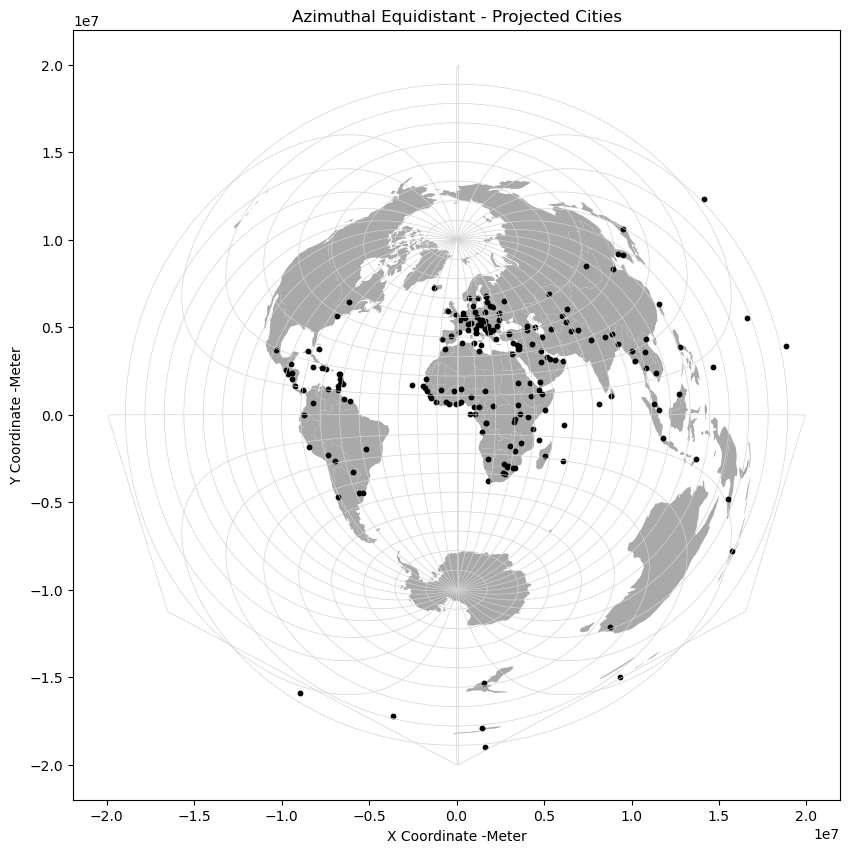

In [25]:
capitals_ae = capitals.to_crs("ESRI:54032")
plot_map_layers(world_ae, capitals_ae, graticules_ae, "Azimuthal Equidistant - Projected Cities", "Meter")